In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

## 데이터 분리
```
-> 훈련/(검증)/테스트
```

### 훈련/테스트용 분리

In [2]:
from sklearn.model_selection import train_test_split

features = iris.data[:, 2:]
labels = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                    test_size=0.2, 
                                                    stratify=labels,
                                                    random_state=13)

In [11]:
X_train.shape, X_test.shape

((120, 2), (30, 2))

### 훈련 / 테스트용이 잘 분리되었을까? 

In [12]:
import numpy as np

np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

### train 데이터만으로 결정나무 모델 만들기

In [13]:
from sklearn.tree import DecisionTreeClassifier

iris_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=13)

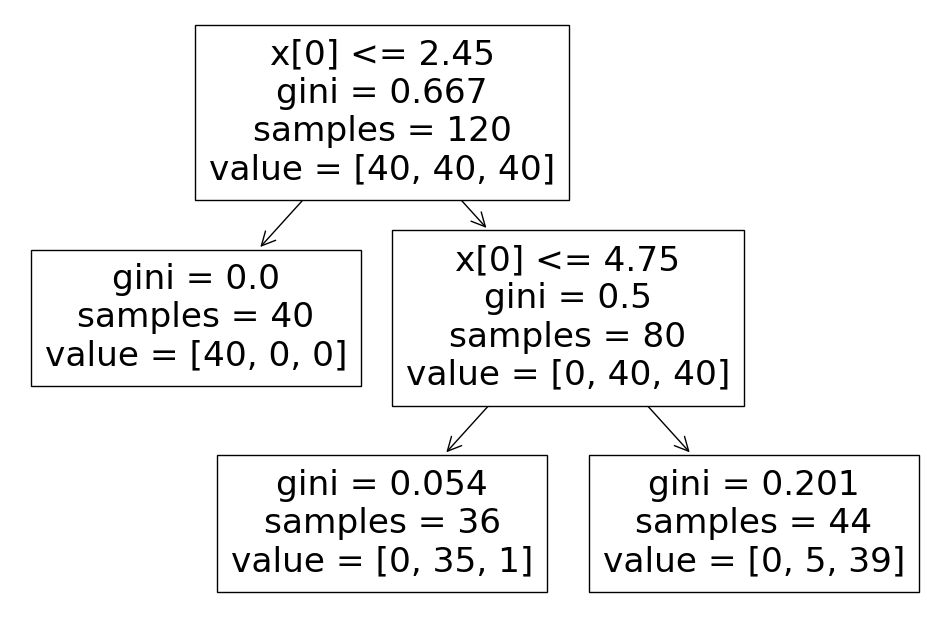

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(iris_tree);

### train 데이터에 대한 accuracy 확인

In [18]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(iris.data[:, 2:])
accuracy_score(iris.target, y_pred_tr)

0.9533333333333334

### 훈련데이터의 결정경계 정하기
```
-> 과적합 막기 위해 
```

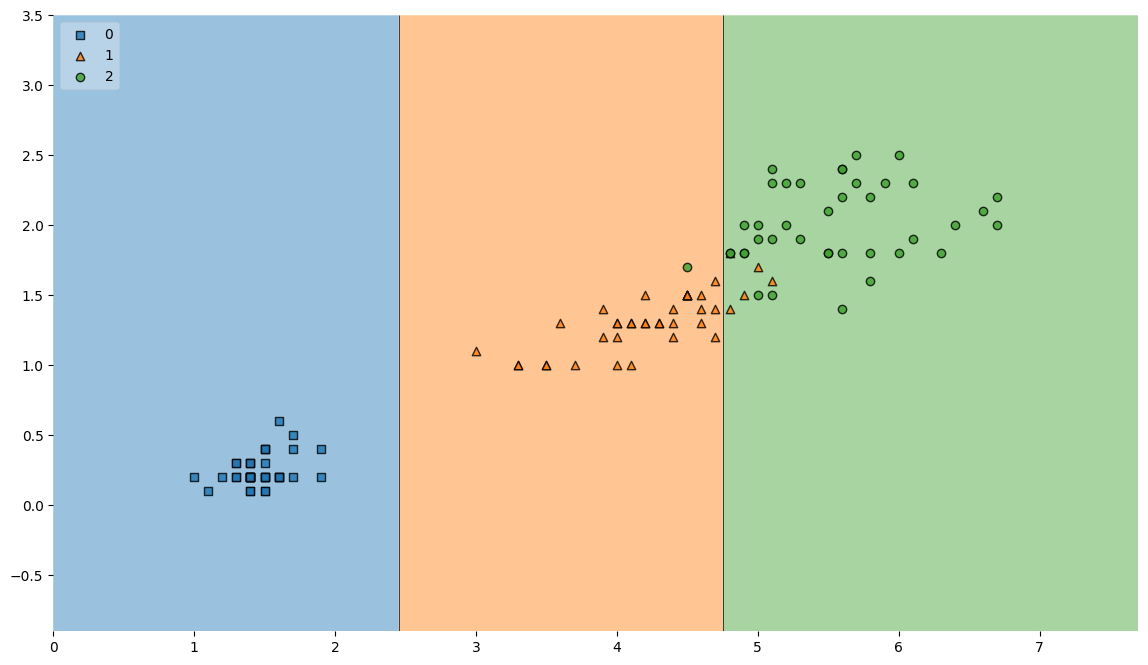

In [21]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(14, 8))
plot_decision_regions(X=X_train, y=y_train, clf=iris_tree, legend=2)
plt.show();

### 테스트 데이터에 대한 accuracy

In [22]:
y_pred_test = iris_tree.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9666666666666667